In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

from pprint import pprint
from field import *




In [36]:
events = pd.read_csv('events_WC22.csv')

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_65267/633937494.py:1: DtypeWarning: Columns (59,72,76,83,88,96,97,98,100,101,102,103,104,105,106,107,109,110,116,117,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('events_WC22.csv')


In [37]:
events.shape

(234652, 145)

In [38]:
euro = events[events['competition_season'] == "UEFA Euro_2020"]
cdm = events[events['competition_season'] == "FIFA World Cup_2022"]
cdm_final = cdm[cdm['match_date'] == "2022-12-18"]

In [39]:
cdm.shape


(234652, 145)

In [142]:
df["possession"].describe()

count    3229.000000
mean      118.778260
std        74.813343
min         2.000000
25%        50.000000
50%       117.000000
75%       187.000000
max       255.000000
Name: possession, dtype: float64

In [40]:
import numpy as np

# Tri du dataframe par index pour s'assurer que les événements sont ordonnés dans le temps
df = cdm_final.sort_index()

# Créer une colonne 'PSV' avec des valeurs par défaut de 0
df['PSV'] = 0

# Identifier les indices des tirs dans le dataframe
shoot_indices = df[df['type.name'] == 'Shot'].index

# Calculer le PSV pour chaque séquence de possession
for idx in shoot_indices:
    possession_idx = df.loc[:idx, 'possession'].max()
    possession_events = df[df['possession'] == possession_idx]

    # Calculer le PSV pour la séquence de possession
    total_xG = possession_events['shot.statsbomb_xg'].sum()
    df.loc[df['possession'] == possession_idx, 'PSV'] = total_xG



In [41]:
df["type.name"].unique()



array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [42]:
df[df["pass.type.name"] == "Kick Off"]

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play,PSV
32354,3869685,FIFA World Cup_2022,2022-12-18,0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,5,1,00:00:00.578,0,0,2,0.975702,30,Pass,771,France,9,From Kick Off,771,France,NaN,NaN,['97b5dc82-547a-4f93-a632-a2a8daf5ac98'],"[61.0, 40.1]",5487.0,Antoine Griezmann,19.0,Center Attacking Midfield,10481.0,Aurélien Djani Tchouaméni,13.364505,2.907503,1.0,Ground Pass,"[48.0, 43.2]",38.0,Left Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
33122,3869685,FIFA World Cup_2022,2022-12-18,0,27725fa3-2887-43e0-8d0d-77246e0fb5e0,773,1,00:23:40.420,23,40,33,1.234272,30,Pass,771,France,9,From Kick Off,771,France,NaN,NaN,['0db72b17-bed3-446f-ae22-468480e33ad6'],"[61.0, 40.1]",3604.0,Olivier Giroud,23.0,Center Forward,3026.0,Adrien Rabiot,8.367795,-2.887919,1.0,Ground Pass,"[52.9, 38.0]",38.0,Left Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [43]:
# afficher lignes de chque changement  possession

# Supposons que votre DataFrame s'appelle df
# Triez le DataFrame par 'timestamp' pour vous assurer que les événements sont dans l'ordre chronologique

# Ajoutez une colonne 'change_of_possession' qui indique les changements de possession
df['change_of_possession'] = df['possession'].ne(df['possession'].shift())

# Filtrer les lignes où il y a un changement de possession
change_of_possession_df = df[df['change_of_possession']]

# Afficher les lignes correspondant à chaque changement de possession
df[["minute","possession", "player.name","change_of_possession", "type.name", "PSV", "shot.statsbomb_xg"]].iloc[4050:4110]

#change_of_possession_df[["minute","second","possession", "player.name","change_of_possession", "type.name", "PSV", "shot.statsbomb_xg"]].head(60)


,minute,possession,player.name,change_of_possession,type.name,PSV,shot.statsbomb_xg
36400,107,228,Leandro Daniel Paredes,True,Ball Recovery,0.592476,NaN
36401,107,228,Leandro Daniel Paredes,False,Carry,0.592476,NaN
36402,107,228,Leandro Daniel Paredes,False,Pass,0.592476,NaN
36403,107,228,Gonzalo Ariel Montiel,False,Ball Receipt*,0.592476,NaN
36404,107,228,Gonzalo Ariel Montiel,False,Carry,0.592476,NaN
36405,107,228,Gonzalo Ariel Montiel,False,Pass,0.592476,NaN
36406,107,228,Lautaro Javier Martínez,False,Ball Receipt*,0.592476,NaN
36407,107,228,Lautaro Javier Martínez,False,Pass,0.592476,NaN
36408,107,228,Lionel Andrés Messi Cuccittini,False,Ball Receipt*,0.592476,NaN
36409,107,228,Lionel Andrés Messi Cuccittini,False,Carry,0.592476,NaN


In [44]:
# create expected threat map
import matplotlib.pyplot as plt
import matplotlib.patches as patches





In [45]:
df["type.name"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [46]:
obv_type= ['Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past','Offside']

In [47]:
df = df[df["type.name"].isin(obv_type)]

In [48]:
df["x"] = df["location"].apply(lambda x: x.split(",")[0][1:]).astype(float)
df["y"] = df["location"].apply(lambda x: x.split(",")[1][:-1]).astype(float)

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_65267/1494411540.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



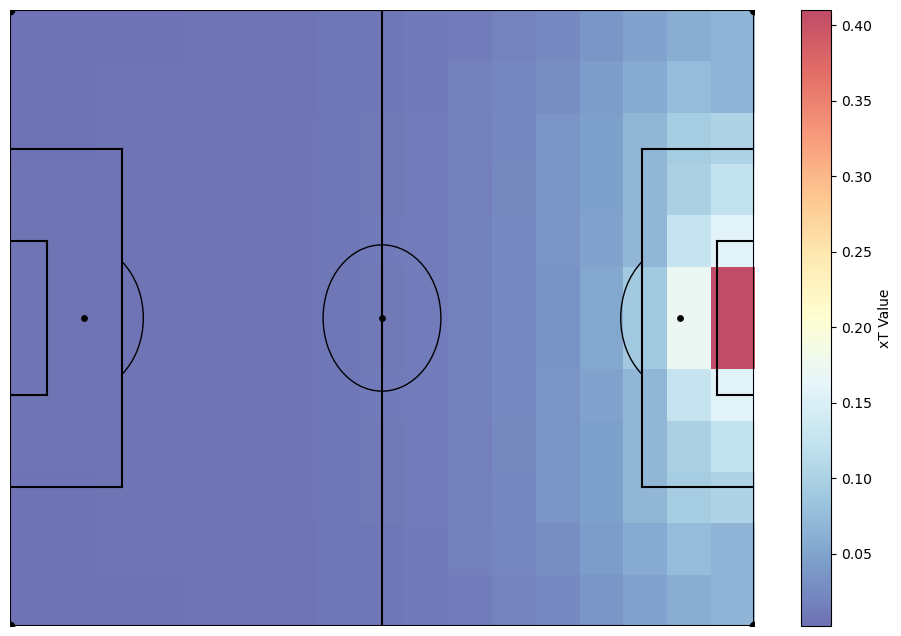

In [139]:

# Provided probabilities for the 6 first rows (mirrored for the 6 following rows)
# Since we have 12 rows in total, we'll assume the pitch is divided into 12 rows (y-coordinate)
# and 16 columns (x-coordinate), giving us zones of 10 units wide (120/12) and 5 units tall (80/16)
prob_rows = np.array([
    [0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.5, 0.7, 0.8, 1, 1.3, 1.8, 2.5, 3.7, 4.8, 6, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.7, 0.8, 1.1, 1.5, 2, 2.9, 4.2, 5.6, 7.5, 6.6],
    [0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.6, 0.7, 0.9, 1.2, 1.6, 2.2, 3.4, 4.6, 6.8, 9.4, 10.3],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.7, 0.9, 1.2, 1.6, 2.3, 3.4, 4.6, 6.8, 9.9, 12.3],
    [0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.7, 1, 1.3, 1.7, 2.5, 3.4, 4.8, 6.8, 12.6, 15.8],
    [0.4, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.8, 0.9, 1.3, 1.7, 2.5, 3.3, 5.2, 8.9, 17.1, 41]
])

# Mirror the probabilities to create a full 12x16 grid
xT_values = np.vstack((prob_rows, np.flipud(prob_rows)))

# Normalize the probabilities to a scale of 0-1 (dividing by 100 since they were given as percentages)
xT_values /= 100

# Function to map location to xT value
def map_location_to_xT(x,y, xT_values):
    # Map the x and y coordinates to the xT grid
    xT_x = min(int(np.floor(float(x) / 120 * 16)), 15)
    xT_y = min(int(np.floor(float(y) / 80 * 12)), 11)
    return xT_values[xT_y, xT_x]

# Apply the function to the DataFrame
df['xT'] = df.apply(lambda row: map_location_to_xT(row['x'], row['y'], xT_values), axis=1)

# Plot the xT values on the pitch
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.axis('off')

# Plot the xT values heatmap
xT_heatmap = ax.imshow(xT_values, extent=(0, 120, 0, 80), aspect='auto', cmap='RdYlBu_r',
                       alpha=0.7)


# Add a colorbar
cbar = plt.colorbar(xT_heatmap)
cbar.set_label('xT Value')

plot_field(ax)






In [125]:
df.iloc[4000:4055][["type.name", "player.name", "outcome","location", "end_location","diff_xT", "xT", "xT.end", "shot.statsbomb_xg"]]

,type.name,player.name,outcome,location,end_location,diff_xT,xT,xT.end,shot.statsbomb_xg
36401,Carry,Leandro Daniel Paredes,None,"[42.8, 43.4]","[43.2, 46.2]",0.000,0.006,0.006,NaN
36402,Pass,Leandro Daniel Paredes,Complete,"[43.2, 46.2]","[63.1, 70.8]",0.002,0.006,0.008,NaN
36403,Ball Receipt*,Gonzalo Ariel Montiel,None,"[63.1, 70.8]",None,-0.008,0.008,0.000,NaN
36404,Carry,Gonzalo Ariel Montiel,None,"[63.1, 70.8]","[64.2, 74.0]",0.000,0.008,0.008,NaN
36405,Pass,Gonzalo Ariel Montiel,Complete,"[64.2, 74.0]","[94.2, 56.4]",0.026,0.008,0.034,NaN
36406,Ball Receipt*,Lautaro Javier Martínez,None,"[94.2, 56.4]",None,-0.034,0.034,0.000,NaN
36407,Pass,Lautaro Javier Martínez,Complete,"[94.2, 56.4]","[91.2, 58.8]",0.000,0.034,0.034,NaN
36408,Ball Receipt*,Lionel Andrés Messi Cuccittini,None,"[91.2, 58.8]",None,-0.034,0.034,0.000,NaN
36409,Carry,Lionel Andrés Messi Cuccittini,None,"[91.2, 58.8]","[91.2, 58.8]",0.000,0.034,0.034,NaN
36410,Pass,Lionel Andrés Messi Cuccittini,Complete,"[91.2, 58.8]","[95.4, 49.4]",0.000,0.034,0.034,NaN


In [50]:
# columns containing "end_location" in the name
df.columns[df.columns.str.contains("pass")]


Index(['pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'pass.cross', 'pass.outcome.id', 'pass.outcome.name',
       'pass.assisted_shot_id', 'pass.shot_assist', 'shot.key_pass_id',
       'pass.deflected', 'pass.aerial_won', 'pass.switch', 'pass.outswinging',
       'pass.technique.id', 'pass.technique.name', 'pass.cut_back',
       'pass.goal_assist', 'pass.through_ball', 'pass.miscommunication',
       'pass.no_touch', 'pass.straight', 'pass.inswinging'],
      dtype='object')

In [51]:
df["shot.outcome.name"].unique()


array([nan, 'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [52]:
df["pass.outcome.name"].unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'], dtype=object)

In [53]:
df["dribble.outcome.name"].unique()

array([nan, 'Incomplete', 'Complete'], dtype=object)

In [54]:
df.loc[(df["pass.outcome.name"].isnull())& (df["type.name"] == "Pass"), "pass.outcome.name"] = "Complete"
df.loc[(df["pass.outcome.id"].isnull()) & (df["type.name"] == "Pass"), "pass.outcome.id"] = 8.

df["pass.outcome.name"].unique()

array(['Complete', nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'],
      dtype=object)

In [55]:
df[df["pass.outcome.name"].isnull()]["type.name"].unique()

array(['Ball Receipt*', 'Carry', 'Pressure', 'Foul Committed', 'Foul Won',
       'Ball Recovery', 'Block', 'Miscontrol', 'Clearance', 'Duel',
       'Interception', 'Dribble', 'Shot', 'Goal Keeper', 'Dispossessed',
       'Dribbled Past', 'Offside'], dtype=object)

In [56]:
def get_outcome(row):
    if row["type.name"] == "Pass":
        return row["pass.outcome.name"]
    elif row["type.name"] == "Dribble":
        return row["dribble.outcome.name"]
    elif row["type.name"] == "Shot":
        return row["shot.outcome.name"]
    else:
        return None
    
df["outcome"] = df.apply(get_outcome, axis=1)

df["outcome"].unique()


array(['Complete', None, 'Out', 'Incomplete', 'Unknown', 'Pass Offside',
       'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [57]:
# end_location est une colonne qui contient les coordonnées de fin de chaque événement. pass_end_location si different de null, shot_end_location si different de null et carry_end_location si different de null

def get_end_location(row):
    if pd.notnull(row['pass.end_location']):
        return row['pass.end_location']
    elif pd.notnull(row['shot.end_location']):
        return row['shot.end_location']
    elif pd.notnull(row['carry.end_location']):
        return row['carry.end_location']
    elif row["type.name"] == "Dribble":
        # return end_location of next event
        row_index = row.name
        next_index = row_index + 1
        if next_index in df.index:  # Vérifie si le prochain index existe
            next_event = df.loc[next_index]
            return next_event.get("carry.end_location")
    else:
        return None

def remove_brackets(x):
    if x[-1] == "]":
        return x[:-1]
    elif x[0] == "[":
        return x[1:]
    else:  
        return x

df['end_location'] = df.apply(get_end_location, axis=1)
df['end_x'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[0])) if pd.notnull(row['end_location']) else None, axis=1)
df['end_y'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[1])) if pd.notnull(row['end_location']) else None, axis=1)

df['end_z'] = df.apply(lambda row: float(remove_brackets(row['end_location'].split(",")[-1])) if pd.notnull(row['end_location']) and row['type.name'] == 'Shot' else 0, axis=1)


df['xT.end'] = df.apply(lambda row: map_location_to_xT(row['end_x'], row['end_y'], xT_values) if pd.notnull(row['end_location']) else None, axis=1)

In [58]:
df.iloc[230:240][["type.name", "player.name", "outcome", "end_location", "carry.end_location", "end_x", "end_y", "end_z", "xT", "xT.end"]]

,type.name,player.name,outcome,end_location,carry.end_location,end_x,end_y,end_z,xT,xT.end
32584,Carry,Theo Bernard François Hernández,None,"[54.2, 15.1]","[54.2, 15.1]",54.2,15.1,0.0,0.010,0.007
32585,Pressure,Rodrigo Javier De Paul,None,None,NaN,NaN,NaN,0.0,0.004,NaN
32586,Pressure,Enzo Fernandez,None,None,NaN,NaN,NaN,0.0,0.008,NaN
32587,Dribbled Past,Enzo Fernandez,None,None,NaN,NaN,NaN,0.0,0.009,NaN
32588,Dribble,Theo Bernard François Hernández,Complete,"[46.5, 34.4]",NaN,46.5,34.4,0.0,0.007,0.006
32589,Carry,Theo Bernard François Hernández,None,"[46.5, 34.4]","[46.5, 34.4]",46.5,34.4,0.0,0.007,0.006
32590,Pass,Theo Bernard François Hernández,Complete,"[40.7, 54.7]",NaN,40.7,54.7,0.0,0.006,0.005
32591,Ball Receipt*,Jules Koundé,None,None,NaN,NaN,NaN,0.0,0.005,NaN
32592,Carry,Jules Koundé,None,"[37.9, 54.7]","[37.9, 54.7]",37.9,54.7,0.0,0.005,0.005
32593,Pass,Jules Koundé,Complete,"[34.5, 34.8]",NaN,34.5,34.8,0.0,0.005,0.005


In [59]:
# j'aimerais verifier que pour tous les x de end_location  plus grandes que x de location on a bien xT.end > xT
df["xT.end"] = df["xT.end"].fillna(0)
df["xT"] = df["xT"].fillna(0)

df_non_null = df.dropna(subset=["end_location", "location"])

# actions vers l'avant dans un df
df_forward = df_non_null[df_non_null['end_location'].apply(lambda x: float(x.split(",")[0][1:])) > df_non_null['location'].apply(lambda x: float(x.split(",")[0][1:]))]


df_forward["forwar"] = df_forward.apply(lambda row: row['xT.end'] >= row['xT'], axis=1)
df_forward[df_forward["forwar"] == False][['location', "end_location",'xT','xT.end', 'forwar', "type.name","minute","second", "player.name",  "team.name", "possession_team.name"]]


/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_65267/3592088776.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forward["forwar"] = df_forward.apply(lambda row: row['xT.end'] >= row['xT'], axis=1)


,location,end_location,xT,xT.end,forwar,type.name,minute,second,player.name,team.name,possession_team.name
32377,"[21.7, 24.5]","[26.6, 3.1]",0.004,0.003,False,Pass,0,45,Nicolás Hernán Otamendi,Argentina,Argentina
32397,"[27.0, 45.9]","[32.1, 54.5]",0.005,0.004,False,Carry,1,19,Cristian Gabriel Romero,Argentina,Argentina
32413,"[72.3, 13.4]","[73.6, 4.7]",0.012,0.010,False,Pass,1,33,Adrien Rabiot,France,France
32476,"[54.8, 37.8]","[56.5, 60.5]",0.008,0.007,False,Pass,3,43,Enzo Fernandez,Argentina,Argentina
32513,"[37.5, 45.1]","[38.8, 46.8]",0.006,0.005,False,Carry,4,19,Kylian Mbappé Lottin,France,France
...,...,...,...,...,...,...,...,...,...,...,...
36459,"[17.6, 36.9]","[43.5, 3.6]",0.005,0.004,False,Pass,111,26,Hugo Lloris,France,France
36487,"[3.3, 68.6]","[5.6, 79.3]",0.003,0.002,False,Pass,111,55,Raphaël Varane,France,Argentina
36499,"[114.1, 9.2]","[116.0, 4.7]",0.075,0.060,False,Pass,112,57,Lautaro Javier Martínez,Argentina,Argentina
36523,"[86.3, 49.6]","[87.1, 69.7]",0.025,0.020,False,Pass,114,22,Youssouf Fofana,France,France


In [133]:
best_shots

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play,PSV,change_of_possession,x,y,xT,outcome,end_location,end_x,end_y,end_z,xT.end,diff_xT
33120,3869685,FIFA World Cup_2022,2022-12-18,0,6d527ebc-a948-4cd8-ac82-daced35bb715,771,1,00:22:24.114,22,24,32,0.625635,16,Shot,779,Argentina,5,Other,779,Argentina,NaN,NaN,['c9b8e568-dcdc-4302-9683-0e9e9a55a42a'],"[108.0, 40.0]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783500,"[120.0, 41.8, 0.2]",93.0,Normal,38.0,Left Foot,88.0,Penalty,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783500,True,108.0,40.0,0.089,Goal,"[120.0, 41.8, 0.2]",120.0,41.8,0.2,0.171,0.082
33527,3869685,FIFA World Cup_2022,2022-12-18,0,ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,1178,1,00:35:22.647,35,22,52,0.466153,16,Shot,779,Argentina,6,From Counter,779,Argentina,NaN,NaN,['07ff403e-90ed-4589-8dc1-d9ac61050632'],"[111.8, 32.1]",2995.0,Ángel Fabián Di María Hernández,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303409,"[120.0, 41.7, 0.5]",93.0,Normal,38.0,Left Fo

In [60]:
pos = "[120.0, 37.6, 1.3]"
pos.split(",")[0][1:]

# remove '[' from a string in general en verifiant si il y en a 1 :


'120.0'

In [61]:
df["diff_xT"] = df["xT.end"] - df["xT"]

In [126]:
df = df[df["type.name"] != "Ball Receipt*"]

In [127]:
# sum of xT for each player
df.groupby("player.name")["diff_xT"].sum().sort_values(ascending=False)


player.name
Rodrigo Javier De Paul             0.400
Lionel Andrés Messi Cuccittini     0.355
Kylian Mbappé Lottin               0.326
Antoine Griezmann                  0.242
Hugo Lloris                        0.242
Lautaro Javier Martínez            0.215
Gonzalo Ariel Montiel              0.184
Kingsley Coman                     0.143
Paulo Bruno Exequiel Dybala        0.097
Leandro Daniel Paredes             0.088
Damián Emiliano Martínez           0.087
Raphaël Varane                     0.062
Dayotchanculle Upamecano           0.023
Nahuel Molina Lucero               0.023
Theo Bernard François Hernández    0.006
Germán Alejandro Pezzella          0.002
Ibrahima Konaté                   -0.005
Jules Koundé                      -0.057
Aurélien Djani Tchouaméni         -0.063
Adrien Rabiot                     -0.084
Enzo Fernandez                    -0.095
Nicolás Hernán Otamendi           -0.104
Alexis Mac Allister               -0.110
Ousmane Dembélé                   -0.139
Edua

In [130]:
df[df["player.name"] == " "].value_counts("type.name")

type.name
Pressure          29
Carry             20
Pass              15
Duel               8
Dispossessed       5
Ball Recovery      4
Dribble            4
Foul Won           4
Foul Committed     3
Miscontrol         3
Shot               3
Name: count, dtype: int64

In [63]:
# sum of xT for each team
# (df.groupby("player.name")["diff_xT"].sum()/ df["player.name"].value_counts()).sort_values(ascending=False)

In [64]:
df[df["player.name"] == "Lionel Andrés Messi Cuccittini"][['location', "end_location",'diff_xT','xT','xT.end', "type.name","minute","second", "player.name",  "team.name", "possession_team.name"]]

,location,end_location,diff_xT,xT,xT.end,type.name,minute,second,player.name,team.name,possession_team.name
32434,"[77.5, 36.9]",None,-0.017,0.017,0.000,Ball Receipt*,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32435,"[77.5, 36.9]","[76.6, 35.7]",0.000,0.017,0.017,Carry,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32437,"[76.6, 35.7]","[116.2, 8.9]",0.058,0.017,0.075,Pass,2,16,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32445,"[100.4, 57.7]",None,-0.046,0.046,0.000,Ball Receipt*,2,26,Lionel Andrés Messi Cuccittini,Argentina,Argentina
32446,"[100.4, 57.7]","[99.3, 57.3]",0.000,0.046,0.046,Carry,2,26,Lionel Andrés Messi Cuccittini,Argentina,Argentina
...,...,...,...,...,...,...,...,...,...,...,...
36677,"[74.1, 34.6]","[92.2, 29.9]",0.021,0.013,0.034,Pass,121,59,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36698,"[58.0, 62.4]",None,-0.007,0.007,0.000,Ball Receipt*,122,52,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36699,"[58.0, 62.4]","[66.8, 62.6]",0.002,0.007,0.009,Carry,122,52,Lionel Andrés Messi Cuccittini,Argentina,Argentina
36700,"[66.8, 62.6]","[104.9, 62.6]",0.037,0.009,0.046,Pass,122,54,Lionel Andrés Messi Cuccittini,Argentina,Argentina


In [65]:
df["type.name"].unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Foul Committed',
       'Foul Won', 'Ball Recovery', 'Block', 'Miscontrol', 'Clearance',
       'Duel', 'Interception', 'Dribble', 'Shot', 'Goal Keeper',
       'Dispossessed', 'Dribbled Past', 'Offside'], dtype=object)

In [66]:
dc = ["Dribble","Carry"]
best_carries = df[(df["type.name"].isin(dc))&(df["shot.outcome.name"]!= "Blocked")&(df["shot.outcome.name"]!= "Wayward")][['end_y', 'end_z','location', "end_location",'diff_xT','xT','xT.end', "dribble.outcome.name","minute","second","period", "player.name",  "team.name", "possession_team.name"]].sort_values(by="diff_xT", ascending=False)

best_carries.sort_values(by="diff_xT", ascending=False).head(10)

,end_y,end_z,location,end_location,diff_xT,xT,xT.end,dribble.outcome.name,minute,second,period,player.name,team.name,possession_team.name
36125,22.8,0.0,"[90.7, 23.3]","[115.3, 22.8]",0.065,0.034,0.099,Complete,98,49,3,Kylian Mbappé Lottin,France,France
36126,22.8,0.0,"[90.7, 23.3]","[115.3, 22.8]",0.065,0.034,0.099,NaN,98,49,3,Kylian Mbappé Lottin,France,France
34359,62.0,0.0,"[96.5, 60.0]","[117.7, 62.0]",0.060,0.034,0.094,NaN,50,34,2,Kylian Mbappé Lottin,France,Argentina
36415,52.0,0.0,"[109.3, 56.9]","[114.4, 52.0]",0.058,0.068,0.126,NaN,107,56,4,Lautaro Javier Martínez,Argentina,Argentina
33224,65.8,0.0,"[81.1, 73.9]","[111.9, 65.8]",0.055,0.013,0.068,NaN,28,26,1,Lionel Andrés Messi Cuccittini,Argentina,Argentina
34578,22.4,0.0,"[76.6, 8.9]","[112.1, 22.4]",0.053,0.015,0.068,NaN,59,39,2,Ángel Fabián Di María Hernández,Argentina,Argentina
35776,23.3,0.0,"[79.4, 11.3]","[110.6, 23.3]",0.053,0.015,0.068,NaN,98,23,2,Julián Álvarez,Argentina,Argentina
34497,73.5,0.0,"[62.7, 69.2]","[114.7, 73.5]",0.052,0.008,0.060,NaN,56,37,2,Jules Koundé,France,France
35763,66.7,0.0,"[90.8, 75.2]","[116.2, 66.7]",0.050,0.025,0.075,NaN,98,8,2,Kingsley Coman,France,France
35762,66.7,0.0,"[90.8, 75.2]","[116.2, 66.7]",0.050,0.025,0.075,Complete,98,8,2,Kingsley Coman,France,France


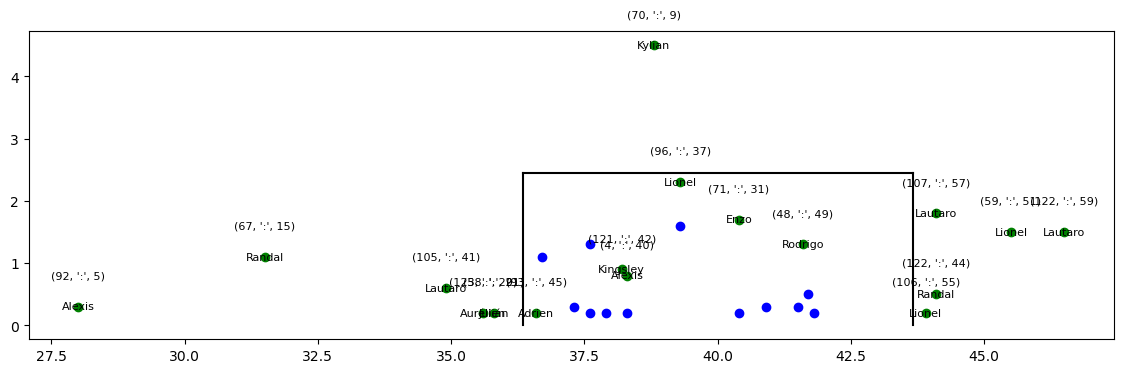

In [67]:
# Taille du but (en mètres)
goal_width = 7.32  # Largeur du but de football standard
goal_height = 2.44  # Hauteur du but de football standard



# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(14, 4))


# dessiner le goal sachant que le centre du goal est à y = 40 et z = 0
ax.plot([40 - goal_width / 2, 40 - goal_width / 2], [0, goal_height], color='black')
ax.plot([40 + goal_width / 2, 40 + goal_width / 2], [0, goal_height], color='black')
ax.plot([40 - goal_width / 2, 40 + goal_width / 2], [goal_height, goal_height], color='black') 

# Afficher les coordonnées xT pour chaque tir
for i, shot in best_shots.iterrows():
    # Dessiner un cercle pour chaque tir
    if shot['shot.outcome.name'] != 'Goal':
        ax.plot(shot['end_y'], shot['end_z'], 'o', color='green')
        ax.text(shot['end_y'], shot['end_z'], shot['player.name'].split(" ")[0], color='black', fontsize=8, ha='center', va='center')
        ax.text(shot['end_y'], shot['end_z']+0.5, (shot['minute'], ":", shot["second"]), color='black', fontsize=8, ha='center', va='center')

    else:
        ax.plot(shot['end_y'], shot['end_z'], 'o', color='blue')
    # Afficher le nom abregé du joueur pour chaque tir
    # ax.text(shot['end_y'], shot['end_z'], shot['player.name'].split(" ")[0], color='black', fontsize=8, ha='center', va='center')
    



In [112]:
best_shots = df[(df["type.name"] == "Shot") & (df["end_z"] < 2.44) & (df["shot.outcome.name"] == "Goal") & (df["period"] < 5)]

In [113]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 3D scatter plot
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

# Add the scatter plot trace
fig.add_trace(
    go.Scatter3d(
        x=best_shots['end_x'],
        y=best_shots['end_y'],
        z=best_shots['end_z'],
        mode='markers',
        marker=dict(
            size=10,
            color='green',
            opacity=0.8
        ),
        text=best_shots['player.name'].apply(lambda x: x.split(" ")[-1] + " " + x.split(" ")[0] + " "),
    )
)

# Set the layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='End X'),
        yaxis=dict(title='End Y'),
        zaxis=dict(title='End Z'),
        aspectmode='manual',
        aspectratio=dict(x=1, y=2, z=1)  # Set the same scaling factor for all axes
    ),
    title='3D Scatter Plot with Cursors',
    width=800,
    height=600,
)

# draw 3 posts of the goal center at (120, 40, 0) and height 2.44  and width 7.32
fig.add_trace(
    go.Scatter3d(
        x=[120, 120, 120, 120, 120],
        y=[40 + goal_width / 2, 40 + goal_width / 2, 40 - goal_width / 2, 40 - goal_width / 2, 40  +goal_width / 2],
        z=[0, goal_height, goal_height, 0, 0],
        mode='lines',
        line=dict(color='black', width=6)
    )
)

# Show the figure
fig.show()


'/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp'

In [88]:
best_shots[best_shots["shot.outcome.name"] != "Goal"][['end_x','end_y', 'end_z','shot.end_location', 'player.name', 'shot.outcome.name', 'minute', 'second']]

,end_x,end_y,end_z,shot.end_location,player.name,shot.outcome.name,minute,second
32541,117.3,38.3,0.8,"[117.3, 38.3, 0.8]",Alexis Mac Allister,Saved,4,40
34265,117.6,41.6,1.3,"[117.6, 41.6, 1.3]",Rodrigo Javier De Paul,Saved,48,49
34553,119.4,35.8,0.2,"[119.4, 35.8, 0.2]",Julián Álvarez,Saved,58,21
34584,120.0,45.5,1.5,"[120.0, 45.5, 1.5]",Lionel Andrés Messi Cuccittini,Off T,59,51
34866,120.0,31.5,1.1,"[120.0, 31.5, 1.1]",Randal Kolo Muani,Off T,67,15
35007,120.0,38.8,4.5,"[120.0, 38.8, 4.5]",Kylian Mbappé Lottin,Off T,70,9
35040,117.8,40.4,1.7,"[117.8, 40.4, 1.7]",Enzo Fernandez,Saved,71,31
35632,118.0,36.6,0.2,"[118.0, 36.6, 0.2]",Adrien Rabiot,Saved,93,45
35738,117.6,39.3,2.3,"[117.6, 39.3, 2.3]",Lionel Andrés Messi Cuccittini,Saved,96,37
35875,120.0,28.0,0.3,"[120.0, 28.0, 0.3]",Alexis Mac Allister,Off T,92,5


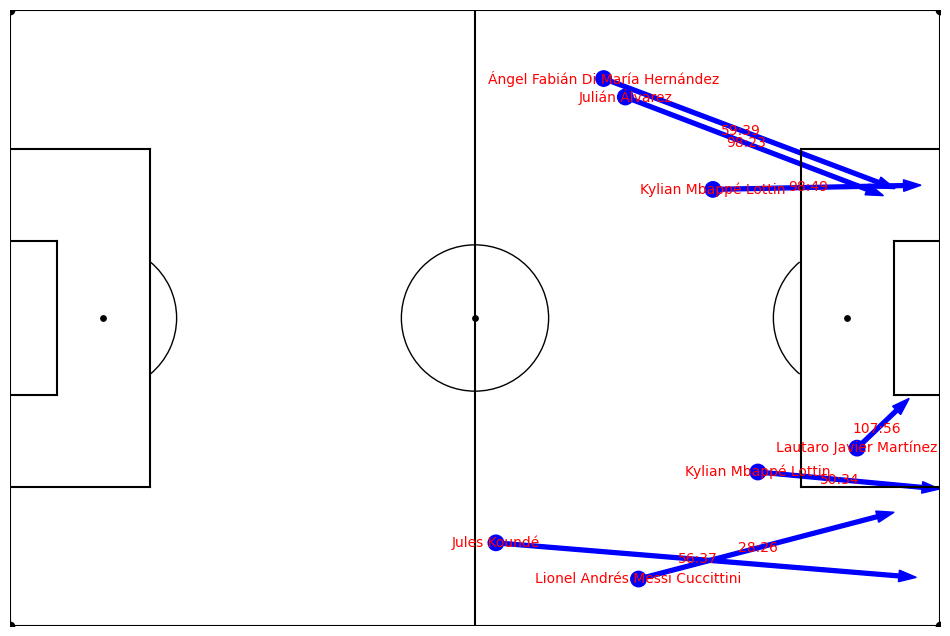

In [48]:
#plot the event on the pitch with arrows for the carry from location to end_location
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the pitch dimensions
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.axis('off')

# Plot the events
for index, row in best_carries.iterrows():
    if row['type.name'] == 'Carry':
        # Get the start and end coordinates
        start_x, start_y = map(float, row['location'][1:-1].split(','))
        end_x, end_y = map(float, row['end_location'][1:-1].split(','))
        start_y = 80 - start_y
        end_y = 80 - end_y
        

        # Plot the arrow
        arrow = patches.FancyArrow(start_x, start_y, end_x - start_x, end_y - start_y, width=0.5, color='blue')
        ax.add_patch(arrow)
        # Add a circle at the start
        circle = patches.Circle((start_x, start_y), 1, color='blue')
        ax.add_patch(circle)

        # Add player.name text at the start
        ax.text(start_x, start_y, row['player.name'], ha='center', va='center', color='red')

        # Add minute and second text at the midlle of the arrow
        ax.text((start_x + end_x)/2, (start_y + end_y)/2, f"{row['minute']}:{row['second']}", ha='center', va='center', color='red')



plot_field(ax)




